# Handwritten Digit Recognizer (MNIST Dataset)

This project focuses on creating a basic handwritten digit recognizer utilizing the MNIST dataset. Additionally, we will test the model's performance on our own handwritten digits created in Paint and saved in various formats such as .jpg and .png.

## The project can be accessed [here](https://github.com/AusAura/mnist).

## Data Characteristics

The images in the MNIST dataset are stored as grayscale images, where pixel values are represented as integers ranging from 0 to 255. In this scale, 0 represents black, and 255 represents white.

The dataset is commonly distributed in the IDX file format, a binary format for storing multidimensional arrays. This format is frequently used for the MNIST dataset.

### IDX File Format Overview:

**Images:**
- Stored in a binary file containing pixel values.
- The first 16 bytes typically contain metadata, including the number of images, rows, and columns.
- The remaining bytes represent the pixel values of the images.

**Labels:**
- The labels (digits corresponding to each image) are stored in a separate binary file.
- Similar to the images file, the first 8 bytes typically contain metadata, and the remaining bytes contain the label values.

## Visualizing the Data

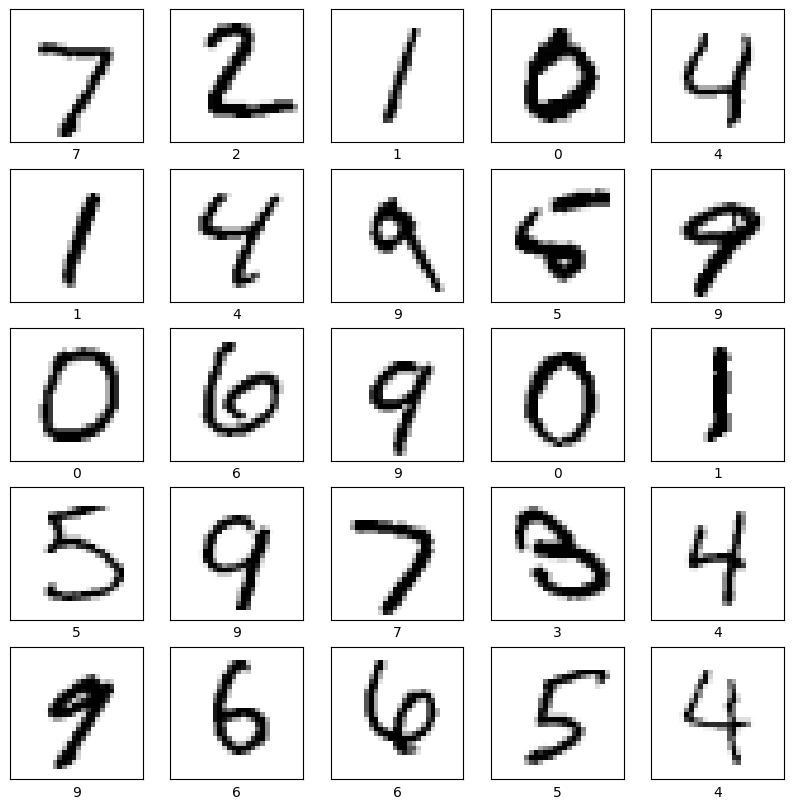

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 25)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        if predictions is not None:
            predicted_label = np.argmax(predictions[i])
            true_label = np.argmax(labels[i])
            color = 'green' if predicted_label == true_label else 'red'
            plt.xlabel(f'{predicted_label} ({true_label})', color=color)
        else:
            ## encoding one-hot to scalar int for categories
#             counter = 0
#             for j in labels[i]:
#                 if j:
#                     class_var = counter
#                     break
#                 counter += 1
#             plt.xlabel(class_var)
            plt.xlabel(str(labels[i])) ## this one fits for sparse_categories
    plt.show()
    
plot_images(test_images, test_labels)

# ANN Structure Overview

In designing our Artificial Neural Network (ANN), several considerations were taken into account:

## Input Layer:
We are working with 28x28 pixel images in black and white (1 channel). The input shape of the first layer is set to accommodate this, preventing data processing issues.

## Convolutional Layers:
Convolutional layers are employed to detect features and automatically learn to identify specific patterns within our images. A filter size of 3x3 is chosen for both effectiveness and speed. Given the use of low-resolution images and the desire to capture detailed features, this size is deemed appropriate.

## Max Pooling Layers:
Max pooling layers are introduced to reduce the size of our images, enabling Conv2D layers to detect more abstract features. The number of filters for deeper layers is increased from 32 to 64 to enhance the network's capacity for feature extraction.

## Activation Function:
ReLU is chosen as the activation function for its speed and ability to mitigate gradient vanishing. Given the simplicity of our task, the likelihood of 'dead neurons' is low, making ReLU a suitable choice.

## Layer Structure:
Three pairs of Convolutional and Max Pooling layers are deemed sufficient for our basic task.

## Flatten Layer:
A Flatten layer is added to convert our data into a 1-dimensional vector.

## Fully Connected Layers:
Two fully connected layers with 128 and 64 neurons, respectively, are employed to reduce the risk of overfitting and control the number of features.

In [5]:
from keras import layers
from keras import models

## Let's use Sequential API because of its simplicity since our task does not require any complex solutions.

model = models.Sequential([
    
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

# Training Our Model

## Data Preprocessing:

To prepare our dataset for training, the following preprocessing steps are performed:

1. **Loading the Dataset:**
   The dataset is loaded, and its size is adjusted to 28x28 pixels to match the input shape of the ANN.

2. **Normalization:**
   Normalization is applied to stabilize learning by reducing differences between pixel values. This involves converting images to the float32 format and dividing their values by 255.

In [1]:
from keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical ###

path = "/kaggle/input/mnist-my/mnist.npz"
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

from sklearn.model_selection import train_test_split

# Dividing Our Dataset into Training and Validation Sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print(val_labels)

[7 3 8 ... 9 7 2]


## Setting the Remaining Hyperparameters

For the remaining hyperparameters, the following choices are made:

- **Optimizer:**
  The optimizer can be either RMSprop or Adam. Both are commonly used optimizers, and their performance may vary based on the specific task.

- **Loss Function:**
  The loss function chosen is `sparse_categorical_crossentropy` since our data class labels are represented as integers ranging from 0 to 9. This is suitable for the task of recognizing hand-written numbers.

- **Training Configuration:**
  The model is trained for 5 epochs initially, with a batch size of 64 to expedite the training process. Additionally, 20% of the training images are allocated for validation to assess the model's performance on unseen data during training.

In [6]:
model.compile(
    optimizer="adam",
#     loss="categorical_crossentropy",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(val_images, val_labels)
)

Epoch 1/5
750/750 [==============================] - 26s 33ms/step - loss: 0.2002 - accuracy: 0.9378 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 2/5
750/750 [==============================] - 24s 33ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 3/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0380 - val_accuracy: 0.9878
Epoch 4/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0434 - val_accuracy: 0.9876
Epoch 5/5
750/750 [==============================] - 25s 34ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0343 - val_accuracy: 0.9893


## Evaluating the Model with the Test Set

After training the model, it is essential to assess its performance on an independent test set. This step helps gauge how well the model generalizes to new, unseen data and provides insights into its overall accuracy and effectiveness.

The test set serves as a benchmark for evaluating the model's real-world applicability and ensures that it can make accurate predictions on data it has not encountered during training.

In [12]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


157/157 [==============================] - 2s 11ms/step - loss: 0.0319 - accuracy: 0.9898

Test accuracy: 99.0%


## Visualizing the Results

To gain insights into the performance of our trained model, we can visualize the results using various metrics and visual representations. This step allows us to:

- **Examine Accuracy:**
  Visualize the accuracy of the model on both the training and validation sets across epochs to understand its learning behavior.

- **Plot Loss:**
  Plot the loss function's values during training to observe how well the model is minimizing the error.

These visualizations provide valuable insights into the strengths and limitations of the model, aiding in further refinement and optimization if necessary.

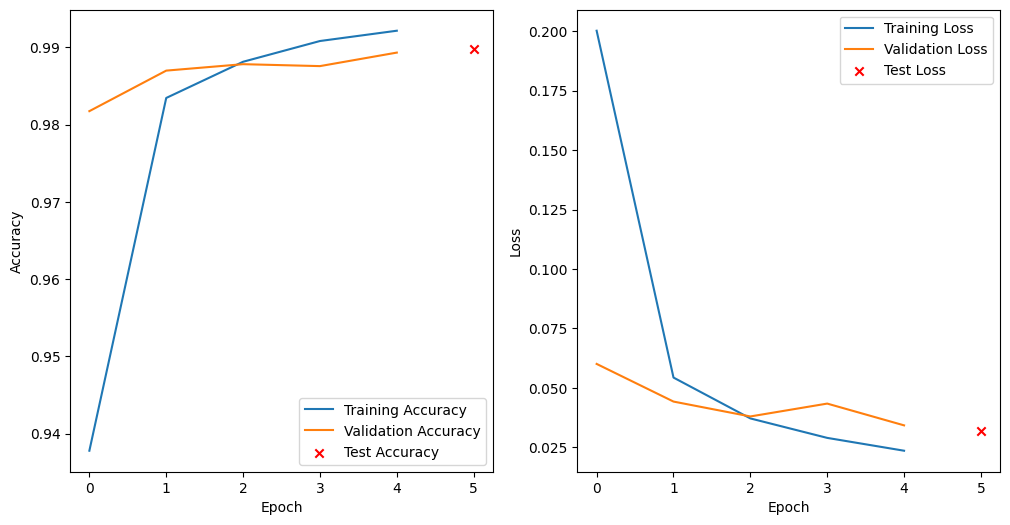

In [16]:
def plot_training_history_with_evaluation(history, evaluation_metrics=None):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    if evaluation_metrics is not None and 'accuracy' in evaluation_metrics:
        plt.scatter(len(history.history['accuracy']), evaluation_metrics['accuracy'], c='red', marker='x', label='Test Accuracy')
    
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    # Check if there is a metric for evaluation
    if evaluation_metrics is not None and 'loss' in evaluation_metrics:
        plt.scatter(len(history.history['loss']), evaluation_metrics['loss'], c='red', marker='x', label='Test Loss')
    
    plt.legend()

    plt.show()

# Model evaluation on the test set
evaluation_metrics = {'loss': loss, 'accuracy': acc}

# Visualizing training results and evaluation
plot_training_history_with_evaluation(history, evaluation_metrics)

# Considering Results

After training and evaluating the model, the following observations can be made:

* The training losses consistently decrease with each epoch, indicating effective model learning.
* The accuracy on the training data steadily increases, a positive sign of a well-trained model.
* Results on the validation data demonstrate a relatively high accuracy, suggesting the model generalizes well to new, unseen data.
* The accuracy on the test data is 99%, which is considered a near-perfect result for the MNIST dataset.

These outcomes signify the successful training of the model for the task of recognizing handwritten digits in the MNIST dataset.

Through visual analysis, it can be observed that the accuracy on the validation data does not exhibit significant fluctuations while the accuracy on the training data increases. This suggests that the model is not overfitted. The same observation is confirmed by the decreasing loss on the validation set.

In some cases, the addition of dropout layers or regularizers might be considered to prevent overfitting. However, given the high-quality nature of the training set and task simplicity, the model was effectively trained without the need for a high number of layers or additional regularization techniques, even with a relatively small number of epochs.


## Saving The Model

In [ ]:
model.save('mnist-recognize.h5')

# Real Tests

## Application Overview

To evaluate this Artificial Neural Network (ANN), we developed a simple Flask server capable of receiving uploaded images and utilizing the model for predictions.

## Data Overview

We utilized a total of 12 real test images, consisting of:

- 5 .jpg images
- 6 .png images
- 1 .webp image

Two of these images represent white digits on a black background from the MNIST dataset, with sizes of approximately 280x280 and 1500x1500 pixels. 

Two images depict black digits on a white background:
- The first is close to the original but resized to approximately 580x580 pixels
- The second is a roughly cut part of the original image with dimensions around 166x305 pixels

The remaining eight images were created using the Paint application:
- Two images sized approximately 1150x650 pixels with thin black lines
- One image sized approximately 1150x650 pixels with a thin red line
- Two images sized approximately 30x30 pixels with thick black lines
- One image sized approximately 30x30 pixels with a thick red line
- Two images sized approximately 220x200 pixels with thick black lines

The dataset can be accessed [here](https://github.com/AusAura/mnist/tree/main/_realtest-images).

# Initial Prototype

We initially used standard PIL Image methods and scikit-image methods for resizing the image. However, this approach led to completely incorrect predictions (100% wrong).

To identify the issue, we visualized the image after preprocessing. Analysis revealed that some images became bleak. Although some were not affected, we suspected the issue lay in the preprocessing algorithm.

## Second Prototype

We opted for CV2 for preprocessing, resulting in the model achieving correct predictions in 50% of cases.

However, some images, especially thin-lined digits in .jpg format, were completely distorted after preprocessing. To address this, we tried another interpolation algorithm and implemented a subtraction trick on the image value.

## Final Prototype (Current State)

While specific previously recognized digits had worse predictions, overall effectiveness increased to 83.33% (10/12).

One of the cases involved a thin-lined ~1150x650 .jpg image of '1'. Upon analysis, the prediction was wrong by only 2%, confusing it with '7'. This can be considered a good result, considering the digit did not resemble the original MNIST dataset examples and was both shrunk and somewhat distorted (confirmed by visual analysis).

The other two cases involved thick-lined black ~220x200 '9' and thick-lined black ~27x27 '6'. '9' is believed to be very distinct from the original MNIST dataset examples.

## Preprocessing

1. The image is uploaded with an HTML form.
2. It is converted to a PIL Image and then to grayscale. For a basic implementation, this might suffice, but using CV2 entirely for reading and converting could offer improvements.

3. The image is converted to a NumPy array.
4. It is resized with CV2. To increase recognition chances, we subtract image values from 255 and use cv2.INTER_AREA for interpolation.
5. The image is reshaped.

## Results

It's important to note that a thorough test should include more examples with differentiated attributes between the groups. However, we can attempt to identify some correlations in the data.

1. Thin-lined black/red ~1150x650 .jpg/.png images -> 0/3 (0%). These images are considered bad data due to size and line boldness differences.

2. Thick-lined black ~30x30 .jpg image -> 1/1 (100%)
3. Thick-lined black ~30x30 .png image -> 0/1 (0%)

4. Thick-lined red ~30x30 .jpg image -> 1/1 (100%)
5. Thick-lined black ~220x200 .png image -> 2/2 (100%)

6. MNIST white-on-black upscaled .webp images -> 0/1 (0%)
7. MNIST white-on-black upscaled .jpg images -> 1/1 (100%)
8. MNIST black-on-white upscaled and distorted images -> 2/2 (100%)

### Post-Analysis

MNIST transformed images -> 3/4
* .webp -> 0/1 (0%)
* .png -> 2/2 (100%)
* .jpg -> 1/1 (100%)

Hand-written images without bad data -> 4/5

Hand-written images with bad data -> 4/8
* Thick-lined -> 4/5
* Thin-lined -> 0/3
* ~1150x650 -> 0/3
* ~30x30 -> 2/3
* ~220x200 -> 2/2
* .jpg in total -> 2/4
* .jpg w/o bad data -> 2/2
* .png in total -> 2/4
* .png w/o bad data -> 1/2

This is an overall satisfying result for our simple approach.

We can suppose that the model works most effectively with digits that were not distorted during resizing.

Also, examples with thick lines are probably working better since they are closer to the training set. But at this point, we cannot be sure since thin-lined examples are also the most distorted ones.

The format as well could have some influence on predictions, but significant differences between preprocessing of .jpg and .png were not found.

The color of the digit seems to not interfere with the predictions.

## Results Visualization For Hand-Written Images

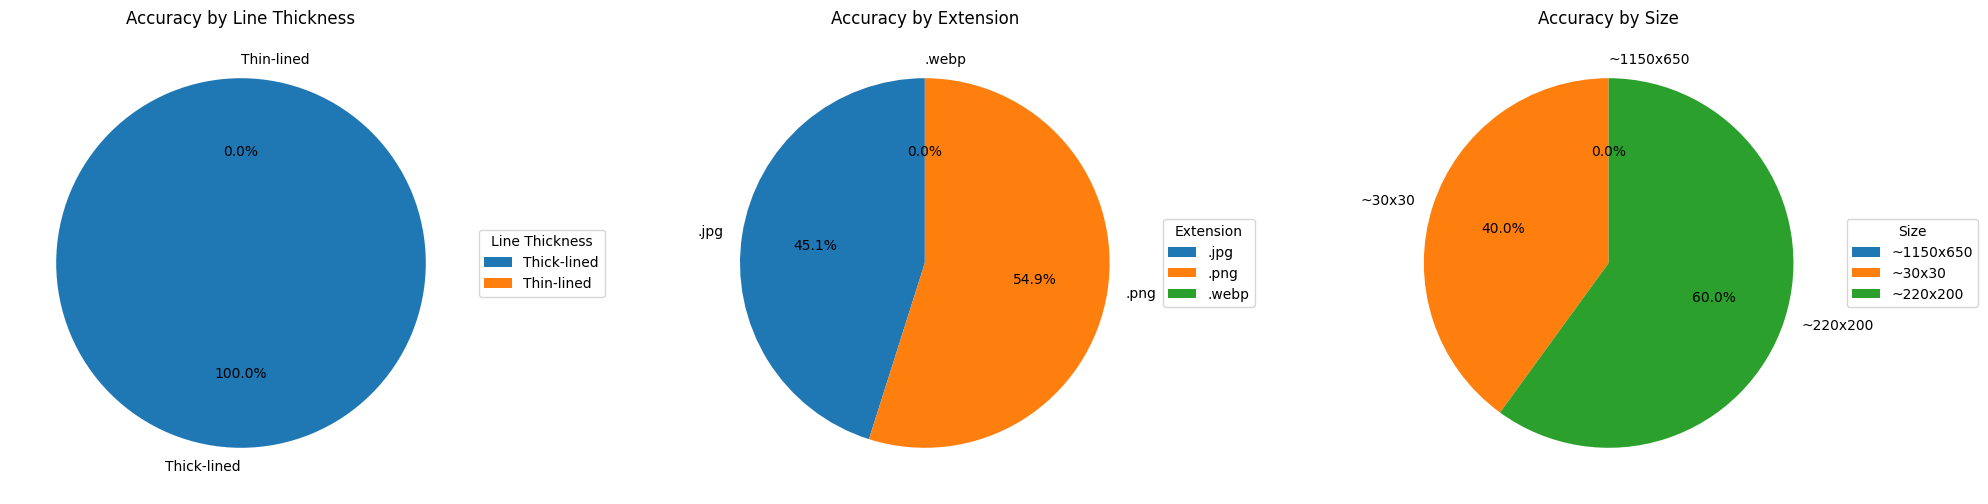

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data
data = [
    ['Hand-written images', 'Thick-lined', 4, 5, 80, 100],
    ['Hand-written images', 'Thin-lined', 0, 3, 0, 100],
    ['Hand-written images', '~1150x650', 0, 3, 0, 100],
    ['Hand-written images', '~30x30', 2, 3, 66.67, 100],
    ['Hand-written images', '~220x200', 2, 2, 100, 100],
    ['Hand-written images', '.jpg', 3, 5, 60, 100],
    ['Hand-written images', '.png', 4, 6, 73, 100],
    ['Hand-written images', '.webp', 0, 1, 0, 100]
]

# Converting to DataFrame
df = pd.DataFrame(data, columns=['Category', 'Subcategory', 'Correct Predictions', 'Total Images', 'Accuracy', 'Accuracy (w/o bad data)'])

# Making figure and axes
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Thickness
axes[0].pie(df[df['Subcategory'].isin(['Thick-lined', 'Thin-lined'])]['Accuracy'], labels=df[df['Subcategory'].isin(['Thick-lined', 'Thin-lined'])]['Subcategory'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Accuracy by Line Thickness')
axes[0].legend(df[df['Subcategory'].isin(['Thick-lined', 'Thin-lined'])]['Subcategory'], title='Line Thickness', loc='center left', bbox_to_anchor=(1, 0.5))


# Extension
axes[1].pie(df[df['Subcategory'].isin(['.jpg', '.png', '.webp'])]['Accuracy'], labels=df[df['Subcategory'].isin(['.jpg', '.png', '.webp'])]['Subcategory'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Accuracy by Extension')
axes[1].legend(df[df['Subcategory'].isin(['.jpg', '.png', '.webp'])]['Subcategory'], title='Extension', loc='center left', bbox_to_anchor=(1, 0.5))


# Size
axes[2].pie(df[df['Subcategory'].isin(['~1150x650', '~30x30', '~220x200'])]['Accuracy'], labels=df[df['Subcategory'].isin(['~1150x650', '~30x30', '~220x200'])]['Subcategory'], autopct='%1.1f%%', startangle=90)
axes[2].set_title('Accuracy by Size')
axes[2].legend(df[df['Subcategory'].isin(['~1150x650', '~30x30', '~220x200'])]['Subcategory'], title='Size', loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()


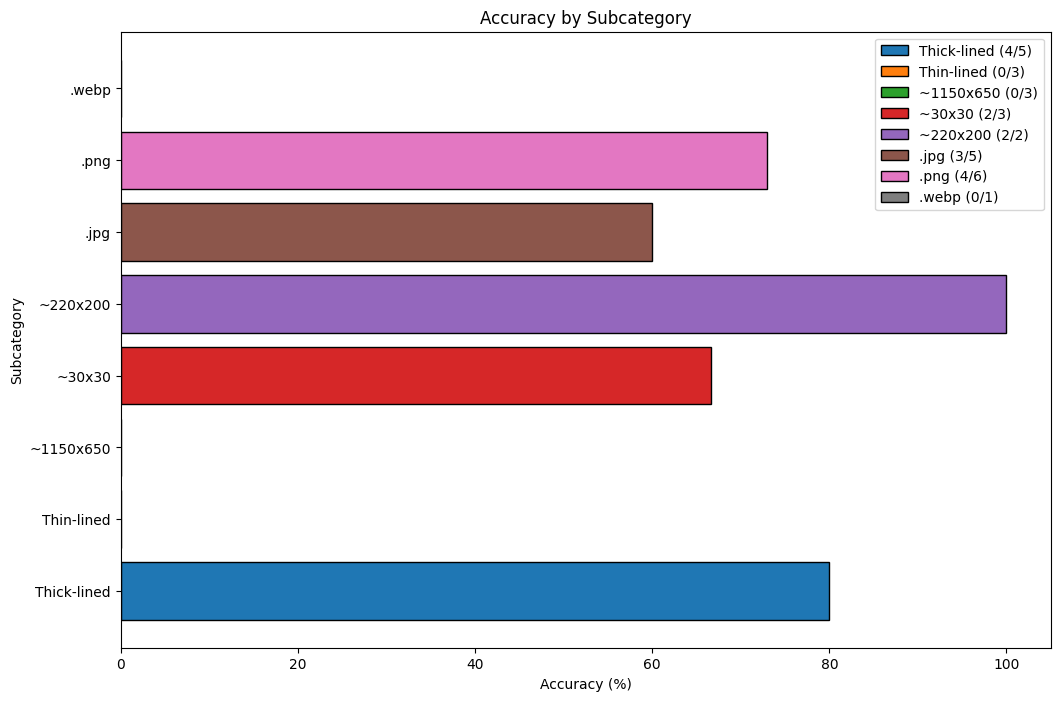

In [34]:


# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar chart for each subcategory
for i, subcategory in enumerate(df['Subcategory'].unique()):
    sub_df = df[df['Subcategory'] == subcategory]
    ax.barh(subcategory, sub_df['Accuracy'], label=f'{subcategory} ({sub_df["Correct Predictions"].sum()}/{sub_df["Total Images"].sum()})', color=f'C{i}', edgecolor='black')

# Add legend and labels
ax.legend()
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Subcategory')
ax.set_title('Accuracy by Subcategory')

plt.show()
